## Visualization of real lookup table

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../../data/config/params/lookup_cell_1exp.csv")

In [13]:
df.head()

,Soc,R_0,R_1,C_1,OCV,Temp
0,1.0,0.005951,0.002942,10659.636448,4.040075,0
1,0.9,0.005921,0.007729,7198.722594,4.027800,0
2,0.8,0.005770,0.007483,8956.178017,3.929000,0
3,0.7,0.005826,0.007141,8409.383822,3.825700,0
4,0.6,0.005830,0.007193,7470.025430,3.744400,0


In [14]:
variables = ['R_0', 'R_1', 'C_1', 'OCV']
temps = set(df['Temp'])

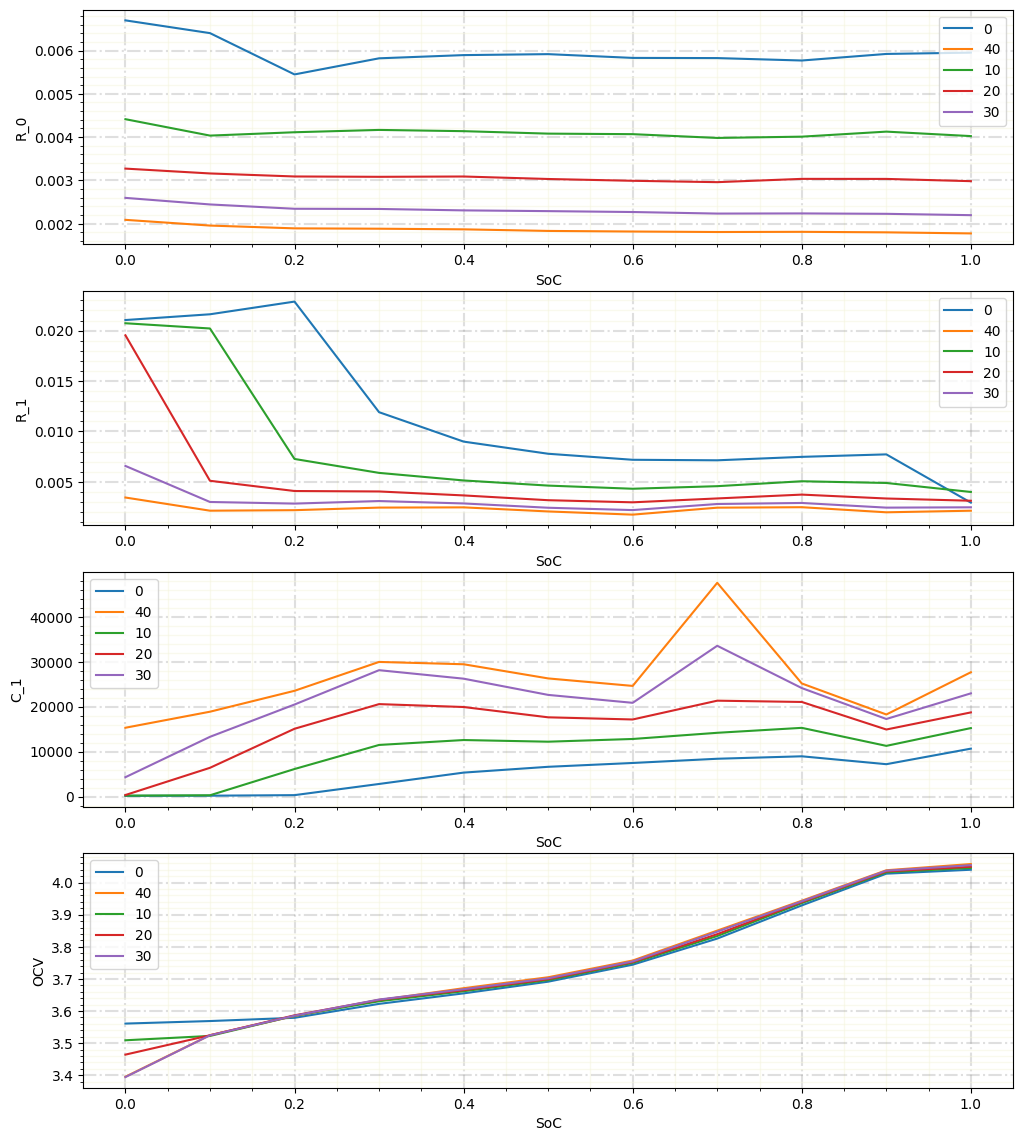

In [15]:
fig, axes = plt.subplots(4,1, figsize=(12,14))

for i, var in enumerate(variables):
    # Command for the grid
    axes[i].grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    axes[i].minorticks_on()
    axes[i].grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    soc = df[df['Temp'] == 40]['Soc'].tolist()
    for temp in temps:
        axes[i].plot(soc, df[df['Temp'] == temp][var].tolist(), label=temp)

    axes[i].set_ylabel(var)
    axes[i].set_xlabel("SoC")
    axes[i].legend()

In [21]:
df[df['Temp'] == 30.0]

,Soc,R_0,R_1,C_1,OCV,Temp
33,1.0,0.002198,0.002480,22966.778613,4.05435,30
34,0.9,0.002229,0.002448,17259.708618,4.03710,30
35,0.8,0.002238,0.002910,24140.464793,3.94170,30
36,0.7,0.002234,0.002808,33555.910173,3.84710,30
37,0.6,0.002271,0.002205,20859.505625,3.75450,30
38,0.5,0.002291,0.002436,22622.611802,3.70200,30
39,0.4,0.002308,0.002862,26234.314231,3.66790,30
40,0.3,0.002341,0.003101,28125.502417,3.63580,30
41,0.2,0.002346,0.002848,20480.705917,3.58550,30
42,0.1,0.002445,0.003009,13290.278684,3.52440,30


## Creation of a trivial lookup table

In [199]:
temp_points = [10, 30]
soc_points = [0, 0.5, 0.50001, 1]

In [200]:
params = {'r0': [], 'r1': [], 'c1': []}

In [201]:
for temp in temp_points:
    for soc in soc_points:
        if soc <= 0.5:
            soc_ref = [0, 0.2, 0.2]
        else:
            soc_ref = [1, 1, 1]
            
        params['r0'].append([temp, soc, df[(df['Temp'] == temp) & (df['Soc'] == soc_ref[0])]['R_0'].values[0]])
        params['r1'].append([temp, soc, df[(df['Temp'] == temp) & (df['Soc'] == soc_ref[1])]['R_1'].values[0]])
        params['c1'].append([temp, soc, df[(df['Temp'] == temp) & (df['Soc'] == soc_ref[2])]['C_1'].values[0]])

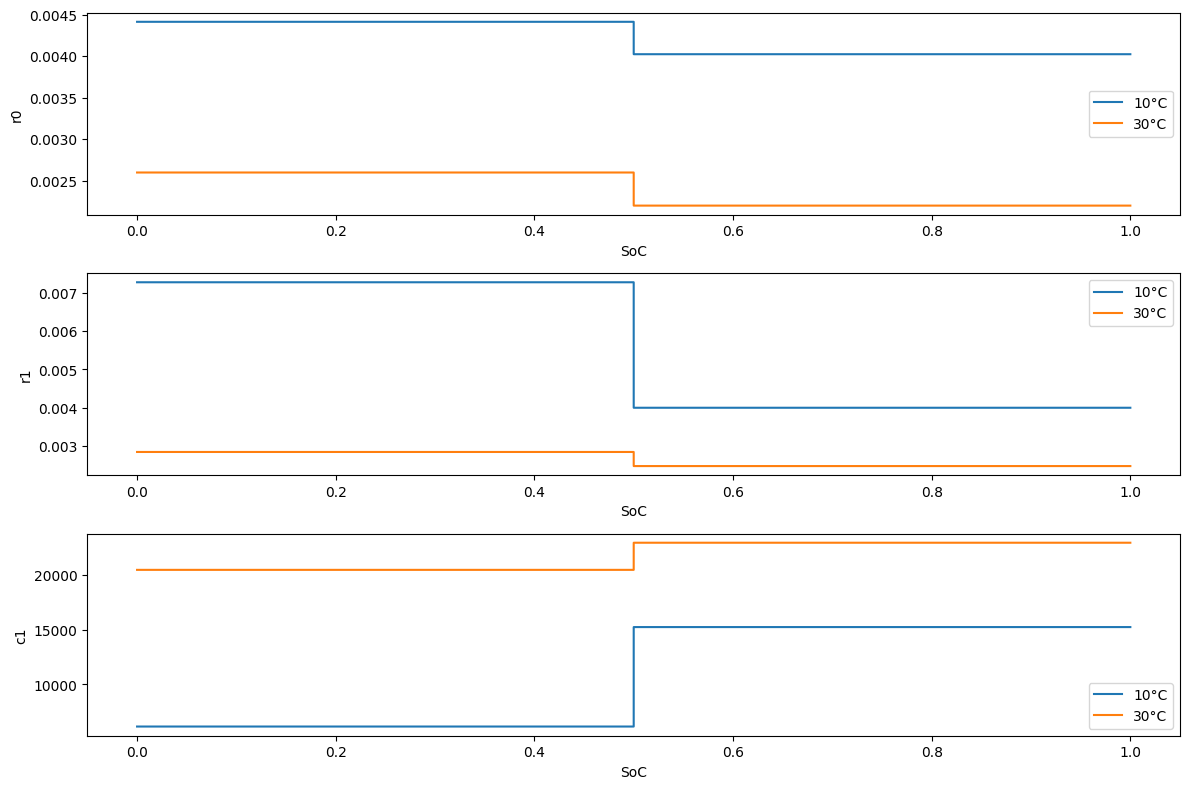

In [202]:
fig, axes = plt.subplots(3, 1, figsize=(12,8))

for i, var in enumerate(params.keys()):
    var_at_10 = [elem for elem in params[var] if elem[0] == 10]
    var_at_30 = [elem for elem in params[var] if elem[0] == 30]
    
    axes[i].plot([elem[1] for elem in var_at_10], [elem[2] for elem in var_at_10], label='10°C')
    axes[i].plot([elem[1] for elem in var_at_30], [elem[2] for elem in var_at_30], label='30°C')

    axes[i].set_ylabel(var)
    axes[i].set_xlabel('SoC')
    axes[i].legend()
fig.tight_layout()

In [203]:
lookup_tables = []

for key, param in params.items():
    lookup_tables.append(pd.DataFrame.from_records(param, columns=['temp', 'soc', key]))

In [204]:
lookup_tables[0]

,temp,soc,r0
0,10,0.00000,0.004415
1,10,0.50000,0.004415
2,10,0.50001,0.004024
3,10,1.00000,0.004024
4,30,0.00000,0.002597
5,30,0.50000,0.002597
6,30,0.50001,0.002198
7,30,1.00000,0.002198


In [205]:
lookup_tables[1]

,temp,soc,r1
0,10,0.00000,0.007274
1,10,0.50000,0.007274
2,10,0.50001,0.004001
3,10,1.00000,0.004001
4,30,0.00000,0.002848
5,30,0.50000,0.002848
6,30,0.50001,0.002480
7,30,1.00000,0.002480


In [206]:
lookup_tables[2]

,temp,soc,c1
0,10,0.00000,6123.883917
1,10,0.50000,6123.883917
2,10,0.50001,15237.558695
3,10,1.00000,15237.558695
4,30,0.00000,20480.705917
5,30,0.50000,20480.705917
6,30,0.50001,22966.778613
7,30,1.00000,22966.778613


In [207]:
for tab, key in zip(lookup_tables, params.keys()):
    tab.to_csv("{}_tab.csv".format(key), index=False)